Data_Train.shape: (120, 4)
[[7.7 3.8 6.7 2.2]
 [5.  2.3 3.3 1. ]
 [5.  3.4 1.6 0.4]
 [4.9 3.1 1.5 0.2]
 [5.4 3.9 1.3 0.4]
 [5.2 3.4 1.4 0.2]
 [6.3 2.5 5.  1.9]
 [6.7 3.1 4.7 1.5]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 5.6 2.4]
 [5.7 2.5 5.  2. ]
 [4.9 2.5 4.5 1.7]
 [5.6 2.8 4.9 2. ]
 [4.7 3.2 1.6 0.2]
 [5.1 3.5 1.4 0.2]
 [6.4 3.2 5.3 2.3]
 [5.  3.3 1.4 0.2]
 [5.8 2.7 5.1 1.9]
 [5.5 2.6 4.4 1.2]
 [7.4 2.8 6.1 1.9]
 [6.  2.2 4.  1. ]
 [5.4 3.7 1.5 0.2]
 [6.1 2.6 5.6 1.4]
 [7.2 3.  5.8 1.6]
 [6.1 2.9 4.7 1.4]
 [7.2 3.6 6.1 2.5]
 [5.4 3.9 1.7 0.4]
 [5.7 3.  4.2 1.2]
 [5.3 3.7 1.5 0.2]
 [5.7 2.8 4.1 1.3]
 [4.8 3.4 1.9 0.2]
 [6.1 3.  4.9 1.8]
 [6.8 3.2 5.9 2.3]
 [5.1 3.4 1.5 0.2]
 [6.1 2.8 4.  1.3]
 [6.5 2.8 4.6 1.5]
 [7.3 2.9 6.3 1.8]
 [6.9 3.1 5.1 2.3]
 [6.7 3.3 5.7 2.5]
 [6.2 2.2 4.5 1.5]
 [6.3 2.5 4.9 1.5]
 [5.6 3.  4.5 1.5]
 [6.3 3.3 4.7 1.6]
 [5.6 2.9 3.6 1.3]
 [6.3 2.7 4.9 1.8]
 [5.8 2.7 5.1 1.9]
 [6.4 2.8 5.6 2.1]
 [4.8 3.  1.4 0.3]
 [5.2 3.5 1.5 0.2]
 [4.9 3.  1.4 0.2]
 [5.5 2.4 3.8 1.1]
 [6.

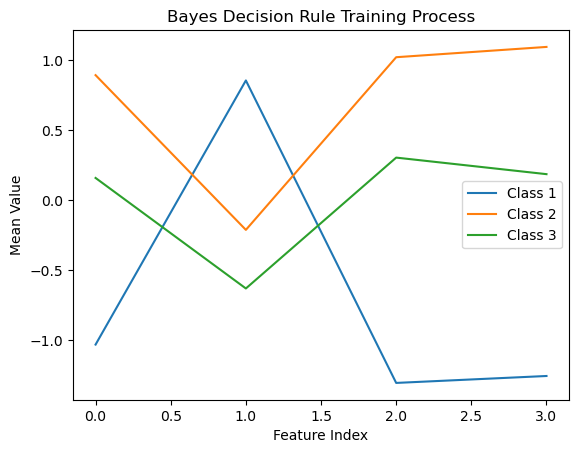

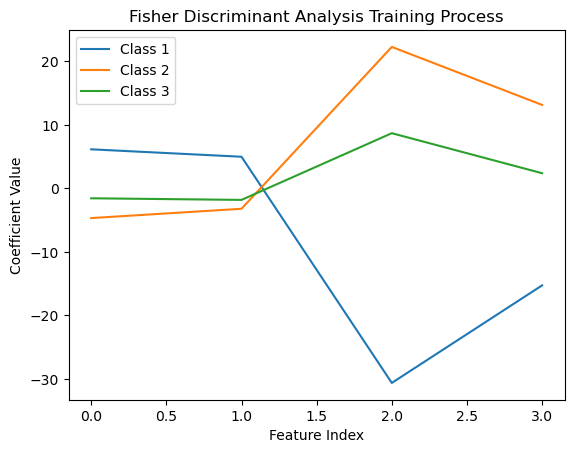

In [6]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Load the training data,labels and test data into numpy array
Data_Train = np.loadtxt('./Data_Train(1).txt')
Label_Train = np.loadtxt('./Label_Train(1).txt')
Data_test = np.loadtxt('./Data_test(1).txt')
print("Data_Train.shape:",Data_Train.shape)
print(Data_Train)
print("Label_Train.shape:",Label_Train.shape)
print("Data_test.shape:",Data_test.shape)

# create an instance of the scaler,fit the scaler to the training data and transform both the training and test data
scaler = StandardScaler()
Data_Train = scaler.fit_transform(Data_Train)
Data_test = scaler.transform(Data_test)
print("Data_Train.shape:",Data_Train.shape)
print(Data_Train)
print("Label_Train.shape:",Label_Train.shape)
print("Data_test.shape:",Data_test.shape)
print(Data_test)

# Initialize Classifier
bayes = GaussianNB()
fisher = LinearDiscriminantAnalysis()
tree = DecisionTreeClassifier()

# Train classifiers on training data
bayes.fit(Data_Train,Label_Train)
fisher.fit(Data_Train,Label_Train)
tree.fit(Data_Train,Label_Train)

# Predict class labels of test data using each classifier
bayes_pred = bayes.predict(Data_test)
fisher_pred = fisher.predict(Data_test)
tree_pred = tree.predict(Data_test)

print("Result by Bayes decision rule:",bayes_pred)
print("Result by Fisher discriminant analysis:",fisher_pred)
print("Result by Decision trees:",tree_pred)

# Plot training process for Bayes and Fisher classifiers
plt.plot(bayes.theta_[0], label='Class 1')
plt.plot(bayes.theta_[1], label='Class 2')
plt.plot(bayes.theta_[2], label='Class 3')
plt.title('Bayes Decision Rule Training Process')
plt.xlabel('Feature Index')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

plt.plot(fisher.coef_[0], label='Class 1')
plt.plot(fisher.coef_[1], label='Class 2')
plt.plot(fisher.coef_[2], label='Class 3')
plt.title('Fisher Discriminant Analysis Training Process')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()